In [ ]:
import pandas as pd

a=pd.read_csv('/content/8732_Hemophilia B.csv')




import ast
def convert_string_to_list(input_string):
    try:
        result_list = ast.literal_eval(input_string)
        return result_list
    except (ValueError, SyntaxError):
        return []

# Example usage
input_string = '["hemophilia b", "von willebrand disease", "hemophilia a", "thrombasthenia", "blood coagulation disorders"]'
converted_list = convert_string_to_list(input_string)
print(converted_list)

def cal_n(x):
    return len(convert_string_to_list(x))
list_=list(a.columns[2:])

for i in list_:
   a[i]=a.apply(lambda x:   cal_n(x[i]),axis=1)

['hemophilia b', 'von willebrand disease', 'hemophilia a', 'thrombasthenia', 'blood coagulation disorders']


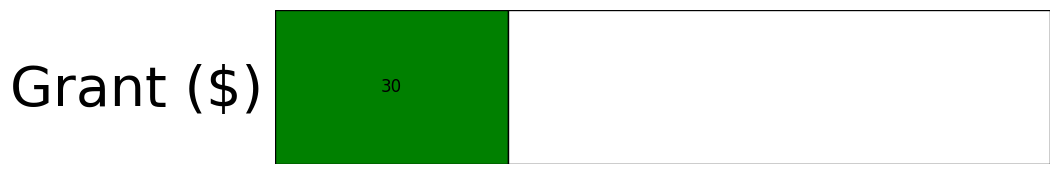

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_value_bar(value, max_value=100):
    # Create a new figure and axis
    fig, ax = plt.subplots(figsize=(10, 2))

    # Define the colors and positions
    green_color = 'green'
    white_color = 'white'
    value_width = value
    remaining_width = max_value - value

    # Add the green rectangle
    green_rect = patches.Rectangle((0, 0), value_width, 1, linewidth=1, edgecolor='black', facecolor=green_color)
    ax.add_patch(green_rect)

    # Add the white rectangle
    white_rect = patches.Rectangle((value_width, 0), remaining_width, 1, linewidth=1, edgecolor='black', facecolor=white_color)
    ax.add_patch(white_rect)

    # Set the limits and remove the axes
    ax.set_xlim(0, max_value)
    ax.set_ylim(0, 1)
    #ax.axis('off')
    ax.xaxis.set_visible(False)  # Hide y-axis
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_yticks([])  # Hide x-axis ticks

    # Add x-axis label
    ylabel = ax.set_ylabel('Grant ($)', fontsize=40, labelpad=100)
    ylabel.set_position((-0.1, 0.3))
    ylabel.set_rotation(0)
    # Add the text to indicate the value
    ax.text(value_width / 2, 0.5, f'{value}', ha='center', va='center', color='black', fontsize=12)

    plt.show()

# Example usage
plot_value_bar(30)

In [ ]:

def convert_years(a):
    df1d=  a[a['funding_year']> 2020 ]
    df1c=  a[ (a['funding_year']< 2020) & (a['funding_year']> 2010) ]
    df1b=  a[ (a['funding_year']< 2010) & (a['funding_year']> 2000) ]
    df1a=  a[a['funding_year']<2000  ]
    cost_a , cost_b  , cost_c, cost_d = df1a['total_cost'].sum() , df1b['total_cost'].sum() , df1c['total_cost'].sum() , df1d['total_cost'].sum()
    df1, df2,  df3 , df4  =  pd.DataFrame(df1a.sum()[3:]), pd.DataFrame(df1b.sum()[3:]),  pd.DataFrame(df1c.sum()[3:]) ,  pd.DataFrame(df1d.sum()[3:])
    df1_filtered = df1[df1[df1.columns[0]] > 0]
    df2_filtered = df2[df2[df2.columns[0]] > 0]
    df3_filtered = df3[df3[df3.columns[0]] > 0]
    df4_filtered = df4[df4[df4.columns[0]] > 0]
    return df1_filtered,  df2_filtered ,df3_filtered ,df4_filtered,df1a.shape[0],df1b.shape[0], df1c.shape[0] , df1d.shape[0], cost_a , cost_b  , cost_c  , cost_d

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Custom autopct function to show labels only for values > 5%
def autopct_func(pct):
    return ('%1.1f%%' % pct) if pct > 4 else ''
def filter_labels(values, labels):
    total = sum(values)
    return [label if value/total > 0.04 else '' for value, label in zip(values, labels)]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

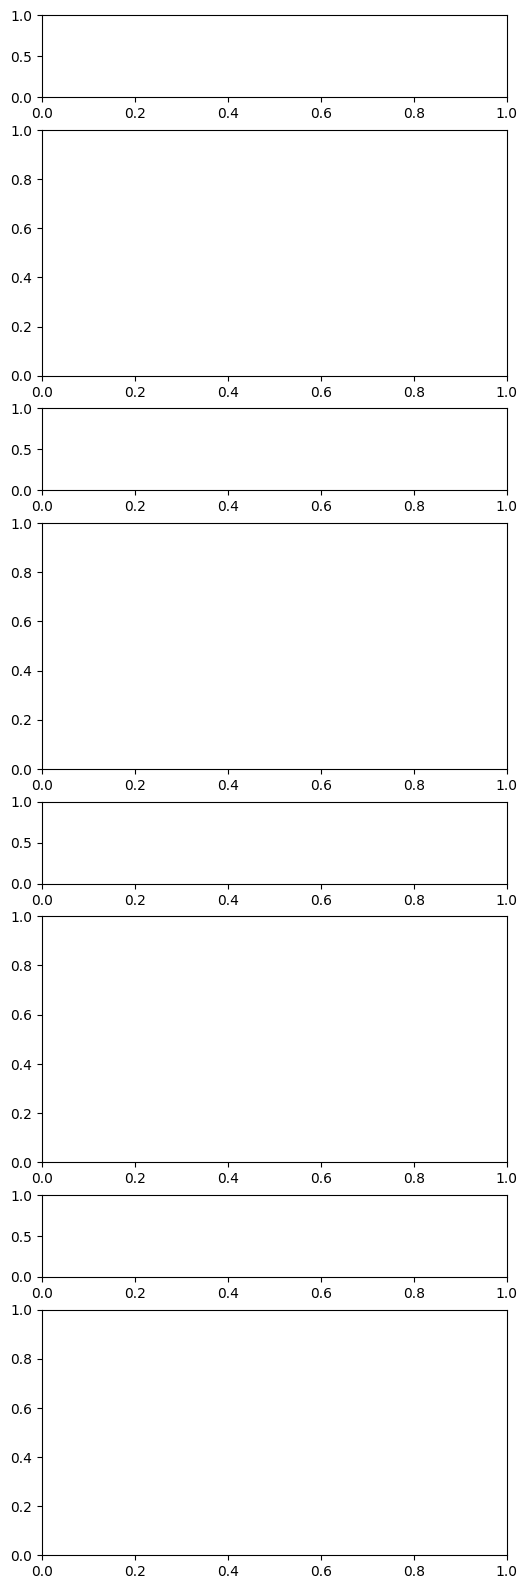

In [ ]:

def plot_value_bar(ax, value, max_value=200000000):
    # Define the colors and positions
    green_color = 'green'
    white_color = 'white'
    value_width = value
    remaining_width = max_value - value

    # Adjust the height of the rectangles
    height = 0.000000000005 * max_value  # Shorter height

    # Add the green rectangle
    green_rect = patches.Rectangle((0, 0), value_width, height, linewidth=1, edgecolor='black', facecolor=green_color)
    ax.add_patch(green_rect)

    # Add the white rectangle
    white_rect = patches.Rectangle((value_width, 0), remaining_width, height, linewidth=1, edgecolor='black', facecolor=white_color)
    ax.add_patch(white_rect)

    # Set the limits and remove the axes
    ax.set_xlim(0, max_value)
    ax.set_ylim(0, 0.005)
    ax.xaxis.set_visible(False)  # Hide x-axis
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_yticks([])  # Hide y-axis ticks

    # Add y-axis label
    ylabel = ax.set_ylabel('Grant ($M)', fontsize=10, labelpad=30)  #'Grant ($20M)'
    ylabel.set_position((-0.1, 0.05))
    ylabel.set_rotation(0)

    # Add the text to indicate the value
    # ax.text(value_width / 2, height / 2, f'{value}', ha='center', va='center', color='black', fontsize=12)


def plot_year(a):
    df1_filtered, df2_filtered, df3_filtered,df4_filtered, s1, s2, s3,s4, cost_a, cost_b, cost_c,cost_d = convert_years(a)

    # Create subplots
    #fig, axs = plt.subplots(2, 3, figsize=(20, 5), gridspec_kw={'height_ratios': [1, 3], 'hspace': -0.065})  # 2 rows, 3 columns
    fig, axs = plt.subplots(8, 1, figsize=(6, 20), gridspec_kw={'height_ratios': [1, 3, 1, 3, 1, 3, 1, 3]})

    # Define colors for each pie chart
    colors1 = plt.cm.Paired(np.linspace(0, 1, len(df1_filtered)))
    colors2 = plt.cm.viridis(np.linspace(0, 1, len(df2_filtered)))
    colors3 = plt.cm.cividis(np.linspace(0, 1, len(df3_filtered)))

    # Plot the value bars
    plot_value_bar(axs[0, 0], cost_a)
    plot_value_bar(axs[0, 1], cost_b)
    plot_value_bar(axs[0, 2], cost_c)
    #plot_value_bar(axs[0, 3], cost_d)

    # Remove axes for bar plots
    for i in range(4):
        axs[0, i].spines['top'].set_visible(False)
        axs[0, i].spines['right'].set_visible(False)
        axs[0, i].spines['left'].set_visible(False)
        axs[0, i].spines['bottom'].set_visible(False)
        axs[0, i].xaxis.set_visible(False)
        axs[0, i].set_yticks([])

    # Plot each pie chart
    values1 = df1_filtered[df1_filtered.columns[0]]
    labels1 = filter_labels(values1, df1_filtered.index)
    axs[1, 0].pie(df1_filtered[df1_filtered.columns[0]], labels=labels1, autopct=autopct_func, startangle=140, colors=colors1)
    axs[1, 0].set_title(f'Year < 2000 ({s1} grants)')

    values2 = df2_filtered[df2_filtered.columns[0]]
    labels2 = filter_labels(values2, df2_filtered.index)
    axs[1, 1].pie(df2_filtered[df2_filtered.columns[0]], labels=labels2, autopct=autopct_func, startangle=140, colors=colors2)
    axs[1, 1].set_title(f'Year 2000-2010 ({s2} grants)')

    values3 = df3_filtered[df3_filtered.columns[0]]
    labels3 = filter_labels(values3, df3_filtered.index)
    axs[1, 2].pie(df3_filtered[df3_filtered.columns[0]], labels=labels3, autopct=autopct_func, startangle=140, colors=colors3)
    axs[1, 2].set_title(f'Year 2010-2020 ({s3} grants)')

    #values4 = df4_filtered[df4_filtered.columns[0]]
    #labels4 = filter_labels(values4, df4_filtered.index)
    #axs[1, 3].pie(df4_filtered[df4_filtered.columns[0]], labels=labels4, autopct=autopct_func, startangle=140, colors=colors3)
    #axs[1, 3].set_title(f'Year > 2020 ({s3} grants)')

    plt.tight_layout()
    plt.show()

plot_year(a)

203102255.0 f 190754554.0 f 101471644.0 f 46882814.0


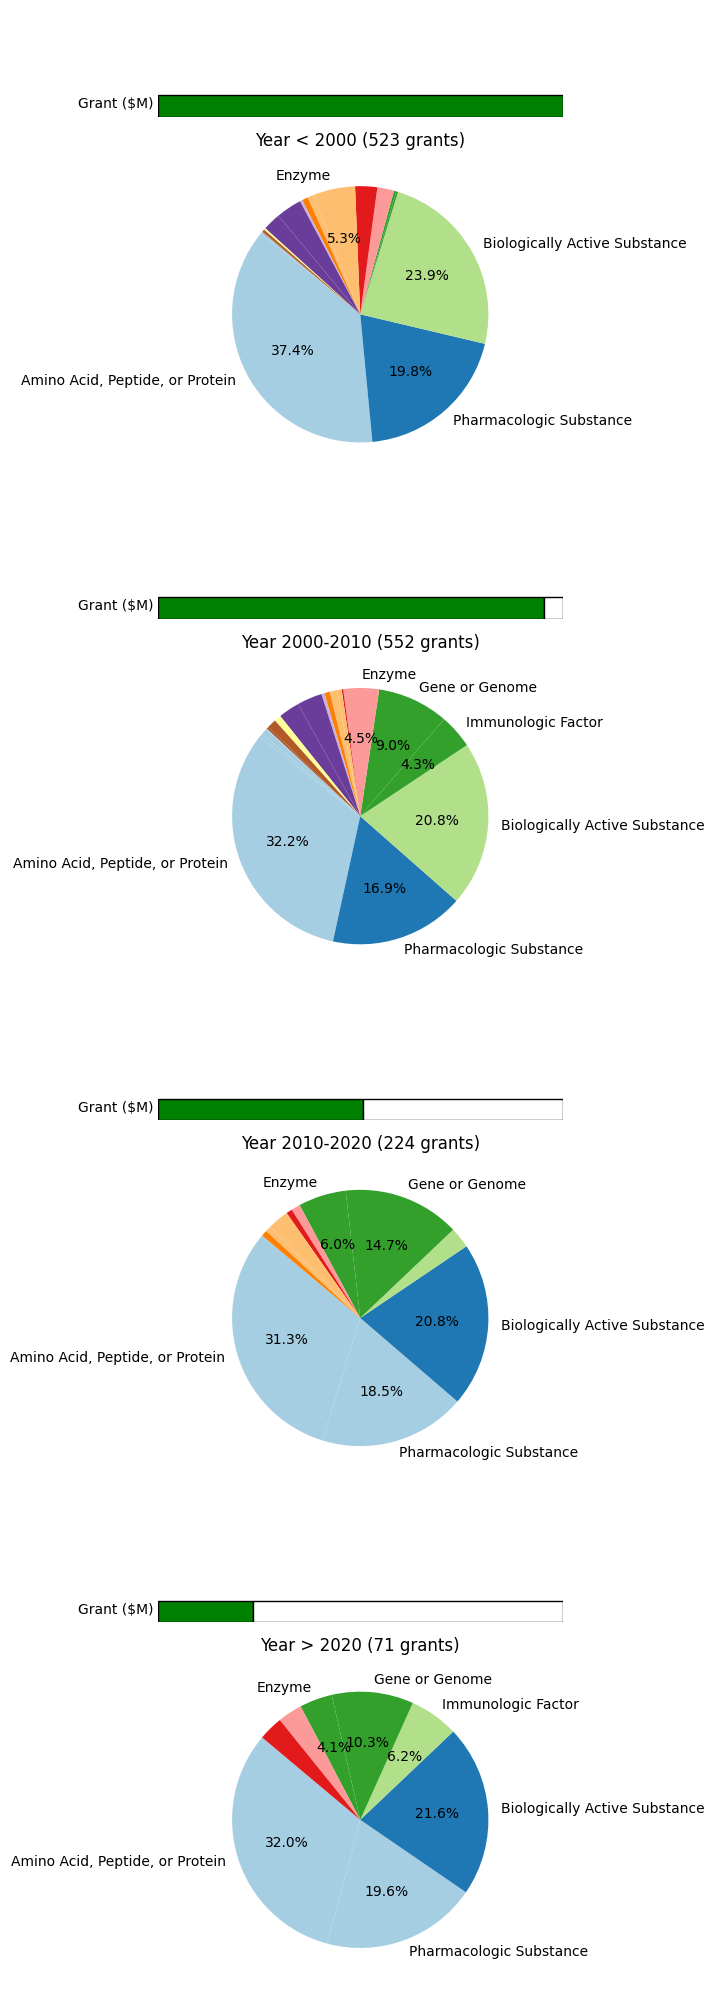

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

def plot_value_bar(ax, value, max_value=200000000):
    # Define the colors and positions
    green_color = 'green'
    white_color = 'white'
    value_width = value
    remaining_width = max_value - value

    # Adjust the height of the rectangles
    height = 0.000000000005 * max_value  # Shorter height

    # Add the green rectangle
    green_rect = patches.Rectangle((0, 0), value_width, height, linewidth=1, edgecolor='black', facecolor=green_color)
    ax.add_patch(green_rect)

    # Add the white rectangle
    white_rect = patches.Rectangle((value_width, 0), remaining_width, height, linewidth=1, edgecolor='black', facecolor=white_color)
    ax.add_patch(white_rect)

    # Set the limits and remove the axes
    ax.set_xlim(0, max_value)
    ax.set_ylim(0, 0.005)
    ax.xaxis.set_visible(False)  # Hide x-axis
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_yticks([])  # Hide y-axis ticks

    # Add y-axis label
    ylabel = ax.set_ylabel('Grant ($M)', fontsize=10, labelpad=30)  #'Grant ($20M)'
    ylabel.set_position((-0.1, 0.05))
    ylabel.set_rotation(0)

def plot_year(a):
    # Replace the following with actual logic to filter data and costs
    df1_filtered, df2_filtered, df3_filtered, df4_filtered, s1, s2, s3, s4, cost_a, cost_b, cost_c, cost_d = convert_years(a)

    # Create subplots (8 rows, 1 column)
    fig, axs = plt.subplots(8, 1, figsize=(6, 20), gridspec_kw={'height_ratios': [1, 3, 1, 3, 1, 3, 1, 3]})

    # Define colors for each pie chart
    colors1 = plt.cm.Paired(np.linspace(0, 1, len(df1_filtered)))
    colors2 = plt.cm.viridis(np.linspace(0, 1, len(df2_filtered)))
    colors3 = plt.cm.cividis(np.linspace(0, 1, len(df3_filtered)))
    print(cost_a,'f',cost_b,'f',cost_c,'f',cost_d)
    # Plot the value bars
    plot_value_bar(axs[0], cost_a)
    plot_value_bar(axs[2], cost_b)
    plot_value_bar(axs[4], cost_c)
    plot_value_bar(axs[6], cost_d)  # Uncomment if cost_d is needed

    # Plot each pie chart
    values1 = df1_filtered[df1_filtered.columns[0]]
    labels1 = filter_labels(values1, df1_filtered.index)
    axs[1].pie(df1_filtered[df1_filtered.columns[0]], labels=labels1, autopct=autopct_func, startangle=140, colors=colors1)
    axs[1].set_title(f'Year < 2000 ({s1} grants)')

    values2 = df2_filtered[df2_filtered.columns[0]]
    labels2 = filter_labels(values2, df2_filtered.index)
    axs[3].pie(df2_filtered[df2_filtered.columns[0]], labels=labels2, autopct=autopct_func, startangle=140, colors=colors1)
    axs[3].set_title(f'Year 2000-2010 ({s2} grants)')

    values3 = df3_filtered[df3_filtered.columns[0]]
    labels3 = filter_labels(values3, df3_filtered.index)
    axs[5].pie(df3_filtered[df3_filtered.columns[0]], labels=labels3, autopct=autopct_func, startangle=140, colors=colors1)
    axs[5].set_title(f'Year 2010-2020 ({s3} grants)')

     #Uncomment the following if you need to plot df4_filtered
    values4 = df4_filtered[df4_filtered.columns[0]]
    labels4 = filter_labels(values4, df4_filtered.index)
    axs[7].pie(df4_filtered[df4_filtered.columns[0]], labels=labels4, autopct=autopct_func, startangle=140, colors=colors1)
    axs[7].set_title(f'Year > 2020 ({s4} grants)')

    plt.tight_layout()
    plt.show()

# Example call to the function
plot_year(a)